In [96]:
# combined spectra of refernces stars for cross correlations

import os
import astropy.io.fits 
import numpy as np
import matplotlib.pyplot as plt
import sys, path
import os
import import_ipynb 
sys.path.append('specmatch-emp')
import specmatchemp.library
import specmatchemp.plots as smplot
from specmatchemp.spectrum import Spectrum
from specmatchemp.specmatch import SpecMatch
from rescale import get_rescaled_wave_soln
from rescale import resample
import astropy.io.fits as pf
from bstar_deblaze import bstar_deblazed2
from astropy.io import fits

path = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/HD10700'
#path = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/GJ699'
files = [file for file in os.listdir(path) if file.endswith('fits')]
hdul1 = astropy.io.fits.open(path + '/' + files[0])
hdul2 = astropy.io.fits.open(path + '/' + files[1])
hdul3 = astropy.io.fits.open(path + '/' + files[2])

# take median of all orders
data = np.zeros((79, 4608))
for order in range(79):
    data[order, :] = np.nanmedian(np.vstack([hdul1[0].data[order, :], hdul2[0].data[order, :], hdul3[0].data[order, :]]), axis = 0)
header = hdul1[0].header

# combine all the spectra of tau ceti --> this averages the pixels in the three spectra instead of taking the median
#data = np.zeros((79, 4608))
#for spect in os.listdir(path):
#    hdul = astropy.io.fits.open(path + '/' + spect)
#    file = pf.open(path + '/' + spect)
#    old_header = file[0].header
#    data_part = file[0].data
#    if (str(np.shape(data_part)) != '(79, 4608)'):
#        print(spect)
#        print('Wrong shape! ' + str(np.shape(data_part)))
#        break
#    else:
#        data += data_part
 
data = data/np.percentile(np.sort(data),99)

orders  = np.linspace(30,51,22).astype(int)
norm_deblazed = np.zeros([len(orders), 4600])
for order in orders:
    data[order,:4600]  = bstar_deblazed2(data, order)
    norm_deblazed[order-30] = data[order,:4600]


# Use Specmatch-Emp to get registered wavelength scale
# Get a wavelength solution rescaled onto the scale of the library
wave_soln_ref = get_rescaled_wave_soln()

# Resample the spectrum onto the new wavelength scale
wave_soln = (pf.open('apf_wav.fits'))[0].data# hdul[0].data
data_new = resample(wave_soln_ref, wave_soln, data)

#print(len(data_new))
    
# Create spectrum object
#my_spectrum = Spectrum(np.asarray(wave_soln_ref), np.asarray(data_new))

#lib = specmatchemp.library.read_hdf()

#sm = SpecMatch(my_spectrum, lib)

# Perform shift
#sm.shift()

# get target and wavelength
#target = sm.target.s
#target_wl = sm.target.w       
    
# save to fits file
new_header = old_header
new_header.set('ND', 'YES','Normalized, deblazed')
data_hdu = fits.PrimaryHDU(data_new, new_header)
wl_hdu = fits.ImageHDU(wave_soln_ref)
hdu = fits.HDUList([data_hdu, wl_hdu])

#save_name = file_name.split('.')[0] + '.' + file_name.split('.')[1] + '.NDR.' + file_name.split('.')[2]
hdu.writeto(path + '/ND.fits')

Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished deblaze
Finished rescale
Finished resample


69935


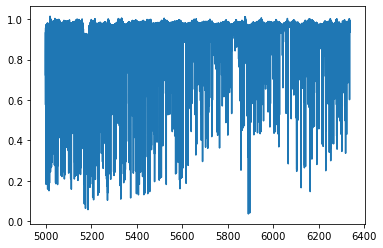

In [99]:
plt.plot(wave_soln_ref,data_new)
print(len(target))

In [107]:
# check that this works for cross-correlation
from scipy import signal

# produce cross-correlation plots
solar_reference = astropy.io.fits.open('./APF_spectra/HD10700/ND.fits')[0].data # --- read in tau ceti spectrum --- #
M_dwarf_reference = astropy.io.fits.open('./APF_spectra/GJ699/ND.fits')[0].data # --- read in M dwarf spectrum --- #

data_new = np.array(data_new)
solar_x_corr =  np.correlate(data_new - np.mean(data_new), solar_reference, mode='same') # =  signal.correlate(data_new, solar_reference)
mdwarf_x_corr = np.correlate(data_new - np.mean(data_new), M_dwarf_reference, mode='same"') #signal.correlate(np.array(data_new), M_dwarf_reference, mode = 'same')

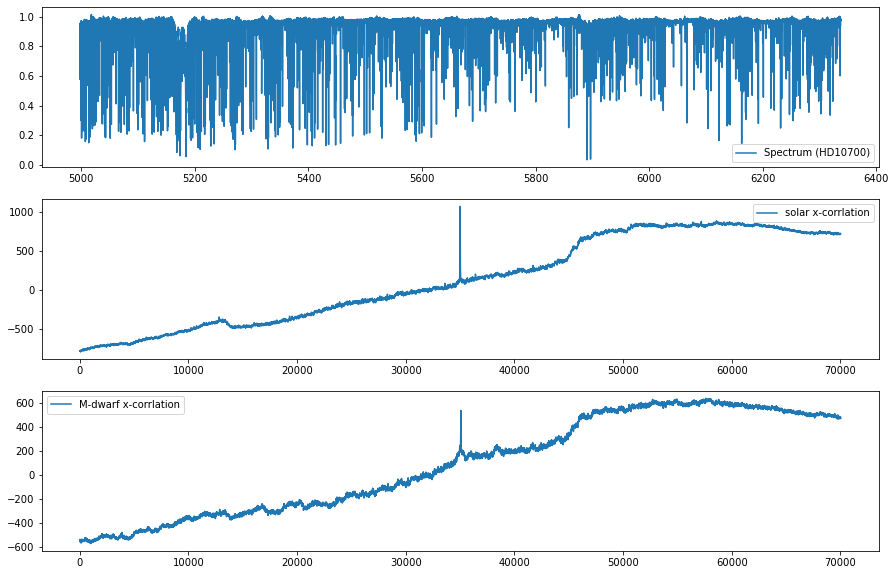

In [109]:
plt.figure(figsize = [15,10])
plt.subplot(311)
plt.plot(wave_soln_ref, data_new, label = 'Spectrum (HD10700)')
plt.legend()
plt.subplot(312)
plt.plot(solar_x_corr, label = 'solar x-corrlation')
plt.legend()
plt.subplot(313)
plt.plot(mdwarf_x_corr, label = 'M-dwarf x-corrlation')
plt.legend()

In [69]:
type(M_dwarf_reference[0])
#type(np.array(data_new))

numpy.float64

array([29638.16634198])

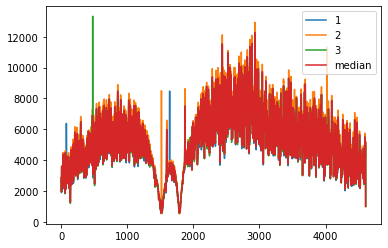

In [93]:
data = np.zeros((79, 4608))
for order in range(79):
    data[order, :] = np.nanmedian(np.vstack([hdul1[0].data[order, :], hdul2[0].data[order, :], hdul3[0].data[order, :]]), axis = 0)
plt.plot(hdul1[0].data[45,:], label = '1')
plt.plot(hdul2[0].data[45,:], label = '2')
plt.plot(hdul3[0].data[45,:], label = '3')
plt.plot(data[45,:], label = 'median')
plt.legend()

In [92]:
data

array([[   22.25043488,    22.25043488,    22.25043488, ...,
           22.25043488,    22.25043488,    22.25043488],
       [   27.54027939,    27.54027939,    27.54027939, ...,
           27.54027939,    27.54027939,    27.54027939],
       [   26.14903259,    26.14903259,    26.14903259, ...,
           26.14903259,    26.14903259,    26.14903259],
       ...,
       [11484.38085938, 11484.38085938, 11484.38085938, ...,
        11484.38085938, 11484.38085938, 11484.38085938],
       [ 7381.65722656,  7381.65722656,  7381.65722656, ...,
         7381.65722656,  7381.65722656,  7381.65722656],
       [ 2721.65966797,  2721.65966797,  2721.65966797, ...,
         2721.65966797,  2721.65966797,  2721.65966797]])

In [111]:
# run this through SM for other testing

# Create spectrum object
my_spectrum = Spectrum(np.asarray(wave_soln_ref), np.asarray(data_new))

lib = specmatchemp.library.read_hdf()

sm = SpecMatch(my_spectrum, lib)

# Perform shift
sm.shift()

sm.match()

    # Perform lincomb
    # NOTE: detrend() is called within lincomb(),
    #       so after this sm.results() gives detrended and sm.results_nodetrend() gives non-detrended results.
sm.lincomb()

Reading library from /home/azuckerman/.specmatchemp/library.h5
Shifting spectrum
Shifting spectrum Spectrum 8
Attempting shift to spectrum NSO, median cross-correlation peak = 1.81
Attempting shift to spectrum 123239, median cross-correlation peak = 1.98
Attempting shift to spectrum 222368, median cross-correlation peak = 0.90
Attempting shift to spectrum 216899, median cross-correlation peak = 1.39
Best reference for shifting: 123239
Shifting entire spectrum
Matching spectrum
Matching region (5000, 5100)
Matching region (5100, 5200)
Matching region (5200, 5300)
Matching region (5300, 5400)
Matching region (5400, 5500)
Matching region (5500, 5600)
Matching region (5600, 5700)
Matching region (5700, 5800)
Matching region (5800, 5900)
Creating linear combinations
Linear combinations in region (5000, 5100)
Linear combinations in region (5100, 5200)
Linear combinations in region (5200, 5300)
Linear combinations in region (5300, 5400)
Linear combinations in region (5400, 5500)
Linear combin

In [114]:
os.getcwd()

'/mnt_home/azuckerman/BL_APF_DAP'